In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import numpy as np
import os

In [2]:
heart = pd.read_csv("cleaned_cardio.csv")
heart.head()

age  height  weight  ap_hi  ap_lo  cardio        BMI  gender_1  gender_2  \
0  50.0    66.0   136.0    110     80       0  21.948577         0         1   
1  55.0    61.0   187.0    140     90       1  35.329481         1         0   
2  52.0    65.0   141.0    130     70       1  23.461065         1         0   
3  48.0    67.0   180.0    150    100       1  28.188906         0         1   
4  48.0    61.0   123.0    100     60       0  23.238108         1         0   

   cholesterol_1  ...  cholesterol_3  gluc_1  gluc_2  gluc_3  smoke_0  \
0              1  ...              0       1       0       0        1   
1              0  ...              1       1       0       0        1   
2              0  ...              1       1       0       0        1   
3              1  ...              0       1       0       0        1   
4              1  ...              0       1       0       0        1   

   smoke_1  alco_0  alco_1  active_0  active_1  
0        0       1       0         0         1  
1        0       1       0         0         1  
2        0       1       0         1         0  
3        0       1       0         0         1  
4        0       1       0         1         0  

[5 rows x 21 columns]

In [3]:
target = heart["cardio"].values.reshape(-1, 1)
target_names = ["no-attack", "attack"]

In [4]:
data = heart.drop("cardio", axis=1)
feature_names = data.columns
data.head()

age  height  weight  ap_hi  ap_lo        BMI  gender_1  gender_2  \
0  50.0    66.0   136.0    110     80  21.948577         0         1   
1  55.0    61.0   187.0    140     90  35.329481         1         0   
2  52.0    65.0   141.0    130     70  23.461065         1         0   
3  48.0    67.0   180.0    150    100  28.188906         0         1   
4  48.0    61.0   123.0    100     60  23.238108         1         0   

   cholesterol_1  cholesterol_2  cholesterol_3  gluc_1  gluc_2  gluc_3  \
0              1              0              0       1       0       0   
1              0              0              1       1       0       0   
2              0              0              1       1       0       0   
3              1              0              0       1       0       0   
4              1              0              0       1       0       0   

   smoke_0  smoke_1  alco_0  alco_1  active_0  active_1  
0        1        0       1       0         0         1  
1        1        0       1       0         0         1  
2        1        0       1       0         1         0  
3        1        0       1       0         0         1  
4        1        0       1       0         1         0

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
# Use standard scaler on  tarining data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
# Scale train and test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

from sklearn.preprocessing import LabelEncoder
y_train_encoded = LabelEncoder().fit_transform(y_train_scaled)
y_test_encoded = LabelEncoder().fit_transform(y_test_scaled)

In [8]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear', probability = True)
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [10]:
# Fit the model using the grid search estimator. 
grid.fit(X_train_scaled, y_train_encoded)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.722, total= 7.0min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.0min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.723, total= 7.1min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 14.1min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.723, total= 6.5min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.722, total= 7.2min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.723, total= 7.0min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.723, total= 7.0min
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.722, total= 6.8min
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.723, total= 8.8min
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.723, total= 6.5min
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 342.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=True, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [11]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [12]:
# List the best score
print(grid.best_score_)

0.7230341664399269


In [13]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)
predictions

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [20]:
# Calculate Classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, predictions, target_names=target_names, output_dict = True)
df = pd.DataFrame(class_report).transpose()
df_to_html = df.to_html()
print(class_report)
print(df_to_html)

{'no-attack': {'precision': 0.6992657856093979, 'recall': 0.8313547486033519, 'f1-score': 0.7596107832190141, 'support': 8592}, 'attack': {'precision': 0.7911200807265388, 'recall': 0.6411214953271028, 'f1-score': 0.708266116022456, 'support': 8560}, 'accuracy': 0.7364155783582089, 'macro avg': {'precision': 0.7451929331679683, 'recall': 0.7362381219652274, 'f1-score': 0.7339384496207351, 'support': 17152}, 'weighted avg': {'precision': 0.74510724819118, 'recall': 0.7364155783582089, 'f1-score': 0.7339863457655079, 'support': 17152}}
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>f1-score</th>
      <th>precision</th>
      <th>recall</th>
      <th>support</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>no-attack</th>
      <td>0.759611</td>
      <td>0.699266</td>
      <td>0.831355</td>
      <td>8592.000000</td>
    </tr>
    <tr>
      <th>attack</th>
      <td>0.708266</td>
      <td>0.791120</td>
      <td>0.64

In [21]:
best_SVC = grid.best_estimator_
best_SVC

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [22]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "pickle_SVC.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_SVC, file)
    

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [25]:
# Calculate the accuracy score and predict target values

new_X_test_data = np.array([[50.0,66.0,136.0,110,80,21.948577,0,1,1,0,0,1,0,0,1,0,1,0,0,1]])


best_SVC_score = pickle_model.score(X_test_scaled, y_test)
print("Test score: {0:.2f} %".format(100 * best_SVC_score))
Ypredict_SVC = pickle_model.predict(new_X_test_data)
Ypredict_SVC

Test score: 73.64 %


array([1], dtype=int64)

In [26]:
df_trial = pd.DataFrame(Ypredict_SVC)
df_trial

0
0  1

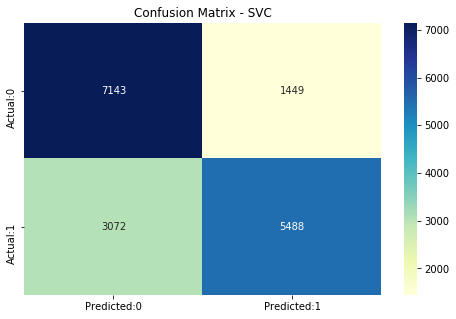

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm_SVC=confusion_matrix(y_test,predictions)
conf_matrix=pd.DataFrame(data=cm_SVC,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix - SVC")
figure1 = sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.savefig("Confusion_Matrix_SVC.png")

In [28]:
TN=cm_SVC[0,0]
TP=cm_SVC[1,1]
FN=cm_SVC[1,0]
FP=cm_SVC[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [29]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7364155783582089 
 The Missclassification = 1-Accuracy =  0.2635844216417911 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.6411214953271028 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8313547486033519 
 Positive Predictive value = TP/(TP+FP) =  0.7911200807265388 
 Negative predictive Value = TN/(TN+FN) =  0.6992657856093979 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.801598266287416 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.4316791421180922


In [30]:
y_pred_prob=best_SVC.predict_proba(X_test_scaled)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no Heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

Prob of no Heart disease (0)  Prob of Heart Disease (1)
0                      0.488440                   0.511560
1                      0.304237                   0.695763
2                      0.804787                   0.195213
3                      0.608924                   0.391076
4                      0.551867                   0.448133

In [31]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=best_SVC.predict_proba(X_test_scaled)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[ 272 8320]
 [  34 8526]] 
 with 8798 correct predictions and 34 Type II errors( False Negatives) 

 Sensitivity:  0.9960280373831776 Specificity:  0.03165735567970205 



With 0.2 threshold the Confusion Matrix is  
 [[1304 7288]
 [ 202 8358]] 
 with 9662 correct predictions and 202 Type II errors( False Negatives) 

 Sensitivity:  0.9764018691588785 Specificity:  0.15176908752327747 



With 0.3 threshold the Confusion Matrix is  
 [[3063 5529]
 [ 707 7853]] 
 with 10916 correct predictions and 707 Type II errors( False Negatives) 

 Sensitivity:  0.9174065420560747 Specificity:  0.35649441340782123 



With 0.4 threshold the Confusion Matrix is  
 [[5627 2965]
 [1793 6767]] 
 with 12394 correct predictions and 1793 Type II errors( False Negatives) 

 Sensitivity:  0.79053738317757 Specificity:  0.6549115456238361 





79.756%


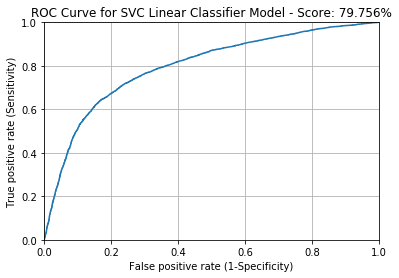

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
AUROC_Score_SVC = roc_auc_score(y_test,y_pred_prob_yes[:,1])
score_SVC = "{0:.3%}".format(AUROC_Score_SVC)
print(score_SVC)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for SVC Linear Classifier Model - Score: ' + str(score_SVC))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.savefig("ROC_Curve_SVC.png")